## Первая попытка

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
house_prices_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'boston-house-prices-regression', 'housing.csv'))
house_prices_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# проверка на NaN-ы
for i in house_prices_df.columns:
    if house_prices_df[i].isnull().values.any():
        print(i)
        house_prices_df[i].fillna(house_prices_df[i].mean(), axis=0, inplace=True)

In [4]:
# разделение на train и test
train, test = np.split(house_prices_df.sample(frac=1), [int(0.8*len(house_prices_df))])

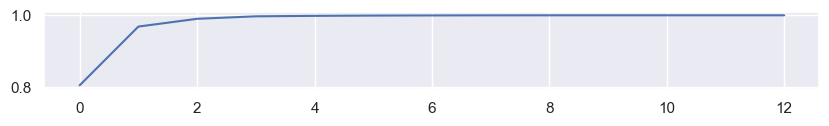

In [5]:
# количество признаков, необходимых для описания дисперсии данных
sample = train.drop('MEDV', axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [6]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop('MEDV', axis=1)
    y = df['MEDV']
    sc = StandardScaler()
    sc.fit_transform(x)
    #pca = PCA(n_components=8)
    #x = pca.fit_transform(x)
    return x, y

In [7]:
# обучение моделей
X_train, Y_train = preprocessing(train)
X_test, Y_test = preprocessing(test)

model_0 = KNeighborsRegressor()
model_0.fit(X_train, Y_train)

model_1 = SVR()
model_1.fit(X_train, Y_train)

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)

model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [8]:
print(
    f'Средняя абсолютная ошибка в процентах {model_0} составляет {mean_absolute_percentage_error(Y_test, model_0.predict(X_test))*100}\n'
    f'MAPE {model_1} составляет {mean_absolute_percentage_error(Y_test, model_1.predict(X_test))*100}\n'
    f'MAPE {model_2} составляет {mean_absolute_percentage_error(Y_test, model_2.predict(X_test))*100}\n'
    f'MAPE {model_3} составляет {mean_absolute_percentage_error(Y_test, model_3.predict(X_test))*100}\n'
)

Средняя абсолютная ошибка в процентах KNeighborsRegressor() составляет 19.358134096399848
MAPE SVR() составляет 24.48831556503307
MAPE DecisionTreeRegressor() составляет 13.816914714632647
MAPE RandomForestRegressor(random_state=42) составляет 10.823180763145192



## Вторая попытка

In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [10]:
housing = pd.read_csv(os.path.join(parent_dir, 'datasets', 'boston-house-prices-regression', 'housing.csv'))
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [12]:
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=42)
housing_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


In [13]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_train.drop('MEDV', axis=1), housing_train['MEDV'])
housing_test_pred = forest_reg.predict(housing_test.drop('MEDV', axis=1))
forest_test_mape = mean_absolute_percentage_error(housing_test['MEDV'], housing_test_pred) * 100
print(f'MAPE = {forest_test_mape} %')  # в процентах

MAPE = 11.092741558151904 %


In [14]:
forest_reg = RandomForestRegressor(n_estimators=500, random_state=42)
forest_scores = cross_val_score(forest_reg, housing_train.drop('MEDV', axis=1), housing_train['MEDV'], scoring='neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print('RMSE')
display_scores(forest_rmse_scores)

RMSE
Scores: [3.56048839 4.84269932 3.81968363 3.21973994 3.7319248 ]
Mean: 3.834907218008303
Standard deviation: 0.5440989838549997


In [15]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_train.drop('MEDV', axis=1), housing_train['MEDV'])
housing_test_pred = svm_reg.predict(housing_test.drop('MEDV', axis=1))
svm_test_mape = mean_absolute_percentage_error(housing_test['MEDV'], housing_test_pred) * 100
print(f'MAPE = {svm_test_mape} %')  # в процентах

MAPE = 16.77127314824966 %


## Третья попытка